In [1]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re
import matplotlib.pyplot as plt
import glob as glob
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
import collections
import string

In [2]:
raw_data = pd.read_csv('data_scientist_united_states_job_postings_jobspikr.csv')

In [3]:
mapper = {'apache spark':'spark', 'math':'mathematics', 'applied mathematics':'mathematics', 
          'nlp':'natural language processing', 'advanced analytics':'analytics', 'applied math':'mathematics',
          'aws':'amazon web services',  'data analytics': 'analytics', 'sql server':'sql' , 
          'git': 'github', 'cs':'computer science', 'ml': 'machine learning', 'big': 'big data',
          'sql experience': 'sql', 'dl': 'deep learning', 'business analytics': 'analytics',
          'powerbi': 'power bi', 'r experience': 'r',
          'office':'microsoft office', 'python experience':'python', 'applied statistics': 'statistics',
          'ms office':'microsoft office', 'azure':'microsoft azure', 'predictive analytics': 'analytics'}

majors = [
    'computer science',
    'statistics',
    'mathematics',
    'operations research',
    'economics',
    'physics',
    'finance',
    'marketing',
    'information technology',
    'electrical engineering',
    'computer engineering',
    'bioinformatics',
    'biostatistics']

keywords = [
    'machine learning',
    'etl',
    'natural language processing',
    'big data',
    'analytics',
    'neural networks',
    'information systems',
    'data visualization',
    'data mining',
    'optimization',
    'computer vision',
    'modeling',
    'clustering']

In [4]:
def get_skills(sentence):
    tokens2 = nltk.word_tokenize(sentence)
    file = open('stopwords.txt')
    stop_words = file.read()
    tagged = nltk.pos_tag(tokens2)
    grammar = r"NP: {<NNP.*>+}"
    cp = nltk.RegexpParser(grammar)
    chunked = cp.parse(tagged)
    skillset = []
    for e in chunked:
        if(type(e) == nltk.tree.Tree):
            skill = ' '.join([w for w, t in e.leaves()])
            skill = skill.split('/')
            cleaned_skill = [word.lower().translate(str.maketrans('', '', string.punctuation)) for word in skill]
            filtered_skill = [word for word in cleaned_skill if not word in stop_words]
            mapped_skill = [mapper[word] if (word in mapper) else word for word in filtered_skill]
            skillset.extend(mapped_skill)                                                                                       
    return skillset

In [5]:
raw_data.loc[:, 'skills'] = raw_data['job_description'].apply(lambda x: get_skills(x))

In [6]:
raw_data.to_csv('dfwithskills.csv')

In [7]:
import pandas as pd
#raw_data = pd.read_csv('dfwithskills.csv')

In [8]:
raw_data['skills'][2]

['java',
 'scala',
 'spark',
 'hadoop',
 'big data',
 'spark',
 'kafka expertlevel',
 'scala',
 'java']

In [9]:
import numpy as np

skills = np.concatenate(raw_data['skills'].values)
tools = [word for word in skills if word not in majors+keywords]

In [10]:
from collections import Counter

In [11]:
toolcount = Counter(tools)

In [12]:
toolcount.most_common(55)

[('python', 10346),
 ('hadoop', 3348),
 ('spark', 3272),
 ('amazon web services', 2836),
 ('sas', 2738),
 ('java', 2664),
 ('tableau', 2334),
 ('scala', 1619),
 ('hive', 1558),
 ('tensorflow', 1383),
 ('matlab', 1078),
 ('microsoft azure', 929),
 ('nosql', 827),
 ('linux', 804),
 ('spss', 605),
 ('agile', 555),
 ('keras', 548),
 ('sql', 519),
 ('power bi', 510),
 ('microsoft office', 500),
 ('unix', 476),
 ('pig', 471),
 ('pandas', 452),
 ('pytorch', 441),
 ('kafka', 428),
 ('javascript', 415),
 ('perl', 412),
 ('numpy', 409),
 ('mapreduce', 407),
 ('mysql', 401),
 ('scikitlearn', 386),
 ('docker', 349),
 ('s3', 306),
 ('svm', 304),
 ('cgi', 302),
 ('nj', 297),
 ('powerpoint', 295),
 ('hbase', 289),
 ('mongodb', 265),
 ('gcp', 258),
 ('random forest', 249),
 ('hdfs', 244),
 ('splunk', 238),
 ('scipy', 233),
 ('saas', 232),
 ('stata', 227),
 ('d3', 225),
 ('pyspark', 224),
 ('regression', 219),
 ('qlikview', 211),
 ('github', 201),
 ('elasticsearch', 188),
 ('ruby', 187),
 ('r', 185),
 

In [13]:
major = [word for word in skills if word in majors]
majorcount = Counter(major)

In [14]:
majorcount

Counter({'statistics': 4142,
         'mathematics': 3981,
         'computer science': 4414,
         'biostatistics': 144,
         'operations research': 1080,
         'physics': 938,
         'computer engineering': 168,
         'electrical engineering': 210,
         'economics': 1048,
         'marketing': 412,
         'finance': 488,
         'bioinformatics': 145,
         'information technology': 303})

In [15]:
keyword = [word for word in skills if word in keywords]
keywordcount = Counter(keyword)

In [16]:
keywordcount

Counter({'big data': 1506,
         'machine learning': 2950,
         'etl': 860,
         'neural networks': 273,
         'clustering': 134,
         'optimization': 262,
         'natural language processing': 2182,
         'analytics': 1164,
         'data visualization': 166,
         'computer vision': 155,
         'data mining': 275,
         'modeling': 211,
         'information systems': 185})

In [17]:
kw = pd.DataFrame({'count': list(keywordcount.values()), 'keyword': list(keywordcount.keys())})

In [18]:
kw = kw.sort_values(by=['count'], ascending=False)
print(kw)

    count                      keyword
1    2950             machine learning
6    2182  natural language processing
0    1506                     big data
7    1164                    analytics
2     860                          etl
10    275                  data mining
3     273              neural networks
5     262                 optimization
11    211                     modeling
12    185          information systems
8     166           data visualization
9     155              computer vision
4     134                   clustering


Text(0, 0.5, 'Keywords')

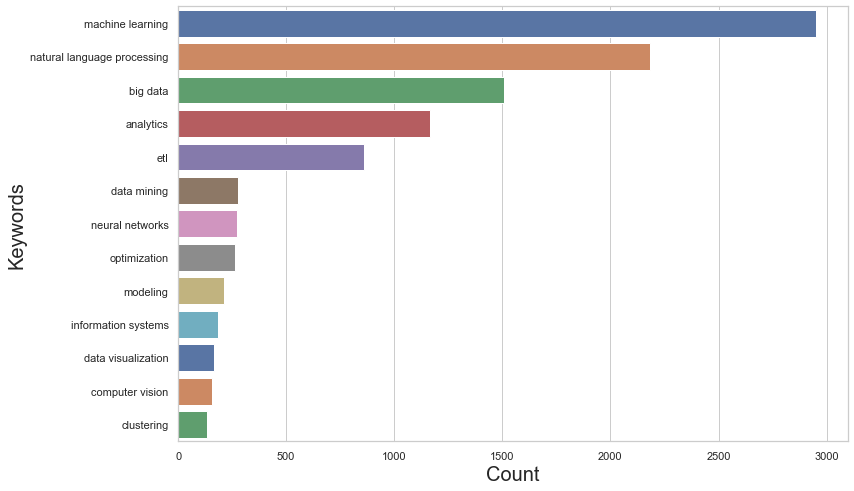

In [19]:
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(x="count", y="keyword", data=kw, palette=sns.color_palette("deep", n_colors=15))
ax.set_xlabel('Count',fontsize=20)
ax.set_ylabel('Keywords',fontsize=20)

In [38]:
plt.scatter(s=kw['count'], cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [20]:
major_df = pd.DataFrame({'count': list(majorcount.values()), 'major': list(majorcount.keys())})
major_df = major_df.sort_values(by=['count'], ascending=False)

Text(0, 0.5, 'Major')

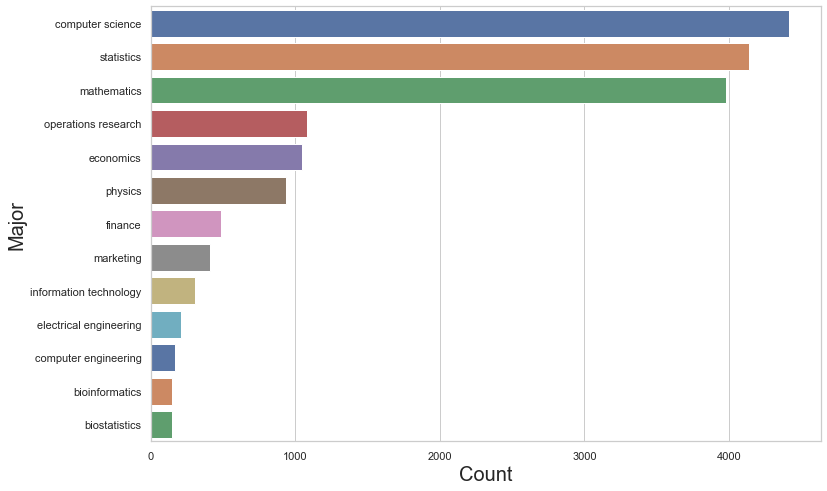

In [21]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(x="count", y="major", data=major_df, palette=sns.color_palette("deep", n_colors=15))
ax.set_xlabel('Count',fontsize=20)
ax.set_ylabel('Major',fontsize=20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a4297a940>],
      dtype=object)

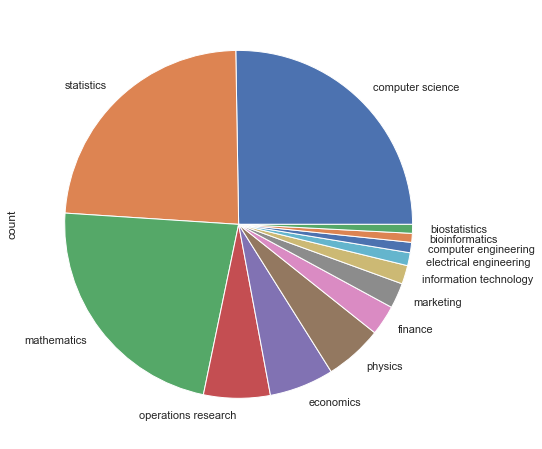

In [36]:
#major_df = major_df.set_index('major')
major_df['count'].plot(kind='pie', subplots=True,figsize=(8, 8))

In [22]:
tools_df = pd.DataFrame({'count': list(toolcount.values()), 'tool': list(toolcount.keys())})
tools_df = tools_df.sort_values(by=['count'], ascending=False)

Text(0, 0.5, 'Tools')

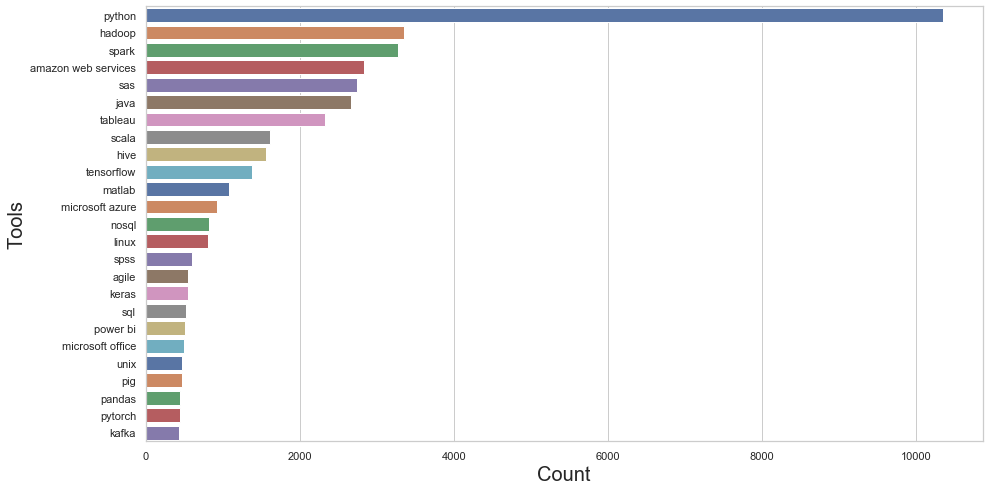

In [23]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x="count", y="tool", data=tools_df.head(25), palette=sns.color_palette("deep", n_colors=25))
ax.set_xlabel('Count',fontsize=20)
ax.set_ylabel('Tools',fontsize=20)

In [43]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
  r=tools_df.head(12)["count"],
  theta=tools_df.head(12)["tool"],
  fill='toself'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=False
)

fig.show()